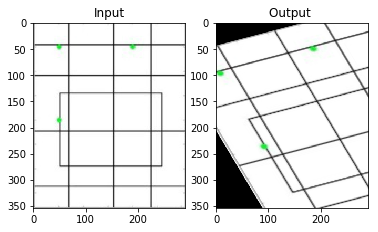

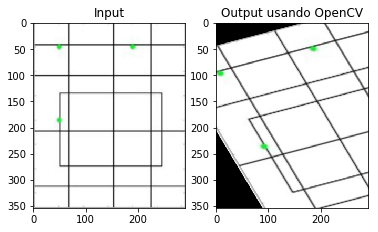

Resultado de la implementacion
[[  1.26666667   0.6        -83.33333333]
 [ -0.33333333   1.          66.66666667]]
Resultado de OpenCV
[[  1.26666667   0.6        -83.33333333]
 [ -0.33333333   1.          66.66666667]]


In [9]:

import cv2 as cv
import math
import sys
import numpy as np
from matplotlib import pyplot as plt
# siguiendo esta formula 
# T=  M  *     ([x,y,1])T --- transpuesta de [x,y,1]
def Get_AffineT(pts1, pts2):
    t1 = len(pts1)
    result = np.ones((2,3),np.float64)
    matriz_A = np.ones((3,3),np.float64)
    matriz_B1 = np.ones((3,1),np.float64) # resultados 0
    matriz_B2 = np.ones((3,1),np.float64) # resultados 1
    for i in range(t1):
        matriz_A[i][0] = pts1[i][0]
        matriz_A[i][1] = pts1[i][1]
        matriz_B1[i] = pts2[i][0]
        matriz_B2[i] = pts2[i][1]
    result_E1 = cv.solve(matriz_A, matriz_B1)[1] #resolucion de ecuaciones
    result_E2 = cv.solve(matriz_A, matriz_B2)[1]
    result[0]= np.transpose(result_E1) # transpose convierte filas en columnas y columnas en filas 
    result[1] = np.transpose(result_E2)
    return result


img = cv.imread('test1.png')
rows,cols,ch = img.shape
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = Get_AffineT(pts1,pts2)
dst = cv.warpAffine(img,M,(cols,rows))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output ')
plt.show()
M1 = cv.getAffineTransform(pts1,pts2)
dst = cv.warpAffine(img,M1,(cols,rows))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output usando OpenCV')
plt.show()
print("Resultado de la implementacion")
print(M)
print("Resultado de OpenCV")
print(M1)